In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/KAN/Repo


/content/drive/MyDrive/KAN/Repo


In [3]:
!pip install -e .

Obtaining file:///content/drive/MyDrive/KAN/Repo
  Preparing metadata (setup.py) ... done
  Running setup.py develop for pykan


In [4]:
from kan import KAN
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [6]:
# read train and test data
train = pd.read_csv('/content/drive/MyDrive/KAN/mnist_test.csv')
test = pd.read_csv('/content/drive/MyDrive/KAN/mnist_train.csv')

In [7]:
# Normalize the datasets
train_normalized = train.copy()
test_normalized = test.copy()

# Normalize all columns except the label column
label_column = 'label'  # Adjust this if your label column has a different name

for column in train_normalized.columns:
    if column != label_column:
        train_normalized[column] = (train_normalized[column]) / 255

for column in test_normalized.columns:
    if column != label_column:
        test_normalized[column] = (test_normalized[column]) / 255

In [8]:
train_normalized.fillna(train.select_dtypes(include=[np.number]).mean(), inplace=True)
test_normalized.fillna(test.select_dtypes(include=[np.number]).mean(), inplace=True)

In [9]:
# Ändere alle Einträge von 0 zu 0.1
train_normalized.replace(0, 0.1, inplace=True)
test_normalized.replace(0, 0.1, inplace=True)

In [10]:
train_normalized.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
1,2.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2,1.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
3,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
4,4.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


In [11]:
"""train= train_normalized.iloc[:10, :65]
test= test_normalized.iloc[:10, :65]
train.value_counts()"""

'train= train_normalized.iloc[:10, :65]\ntest= test_normalized.iloc[:10, :65]\ntrain.value_counts()'

In [12]:
# convert data to tensors
train_input = torch.tensor(train.drop('label', axis=1).values, dtype=torch.float32)
test_input = torch.tensor(test.drop('label', axis=1).values, dtype=torch.float32)
train_label = torch.tensor(train['label'].values, dtype=torch.float32)
test_label = torch.tensor(test['label'].values, dtype=torch.float32)

In [13]:
train_label

tensor([7., 2., 1.,  ..., 4., 5., 6.])

In [14]:
train_input.shape, test_input.shape, train_label.shape, test_label.shape

(torch.Size([10000, 784]),
 torch.Size([60000, 784]),
 torch.Size([10000]),
 torch.Size([60000]))

In [15]:
dataset = {
    'train_input': train_input,
    'train_label': train_label,
    'test_input': test_input,
    'test_label': test_label
}

In [17]:
dataset['train_input'] = train_input.to(device)
dataset['test_input'] = test_input.to(device)
dataset['train_label'] = train_label.to(device)
dataset['test_label'] = test_label.to(device)

In [20]:
# Convert labels to Long tensors
dataset['train_label'] = dataset['train_label'].long()
dataset['test_label'] = dataset['test_label'].long()

In [21]:
input_dim = train_input.shape[ 1 ]   # Anzahl der Eingabefunktionen
output_dim = 10   # Anzahl der Klassen
model = KAN(width=[input_dim, 1, output_dim], grid= 3 , k= 3 , seed= 0)  # Vereinfachte Modellkonfiguration

x_eval contains NaN: False
Result solution shape: torch.Size([784, 1, 6, 1])
x_eval contains NaN: False
Result solution shape: torch.Size([1, 10, 6, 1])
Directory already exists: ./model


In [22]:
def train_acc():
  return torch.mean((torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).float())


results = model.fit(dataset, opt="LBFGS", steps=5, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss())

description:   0%|                                                            | 0/5 [00:00<?, ?it/s]

x_eval contains NaN: False
Result solution shape: torch.Size([784, 1, 6, 1])
x_eval contains NaN: False
Result solution shape: torch.Size([1, 10, 6, 1])


train loss: 1.31e+00 | test loss: 1.36e+00 | reg: 3.95e+03 : 100%|████| 5/5 [04:53<00:00, 58.72s/it]


In [23]:
train_acc()

tensor(0.3227)

In [24]:
test_acc()

tensor(0.3192)

In [27]:
model.saveckpt('/content/drive/MyDrive/KAN/model_mnist')

In [35]:
#Ka warum das nicjt geht, ist eigentlich eine Vorhandene Funktion im Repo ^^
#loadckpt('/content/drive/MyDrive/KAN/model_mnist')

NameError: name 'loadckpt' is not defined

In [36]:
model(dataset['test_input'])

tensor([[ 0.9791, -4.4036,  1.0072,  ..., -2.4629,  1.1250, -1.3665],
        [ 1.0923, -4.2300,  0.9756,  ..., -2.6421,  1.0954, -1.6491],
        [-1.9372,  4.1746, -0.6472,  ...,  3.2677, -1.1708,  2.4930],
        ...,
        [ 0.9076, -4.4268,  1.0099,  ..., -2.3372,  1.1219, -1.2057],
        [-0.4108, -2.1082,  0.5219,  ...,  0.3234,  0.3775,  1.1317],
        [ 1.1045, -4.1939,  0.9687,  ..., -2.6589,  1.0879, -1.6830]],
       grad_fn=<AddBackward0>)

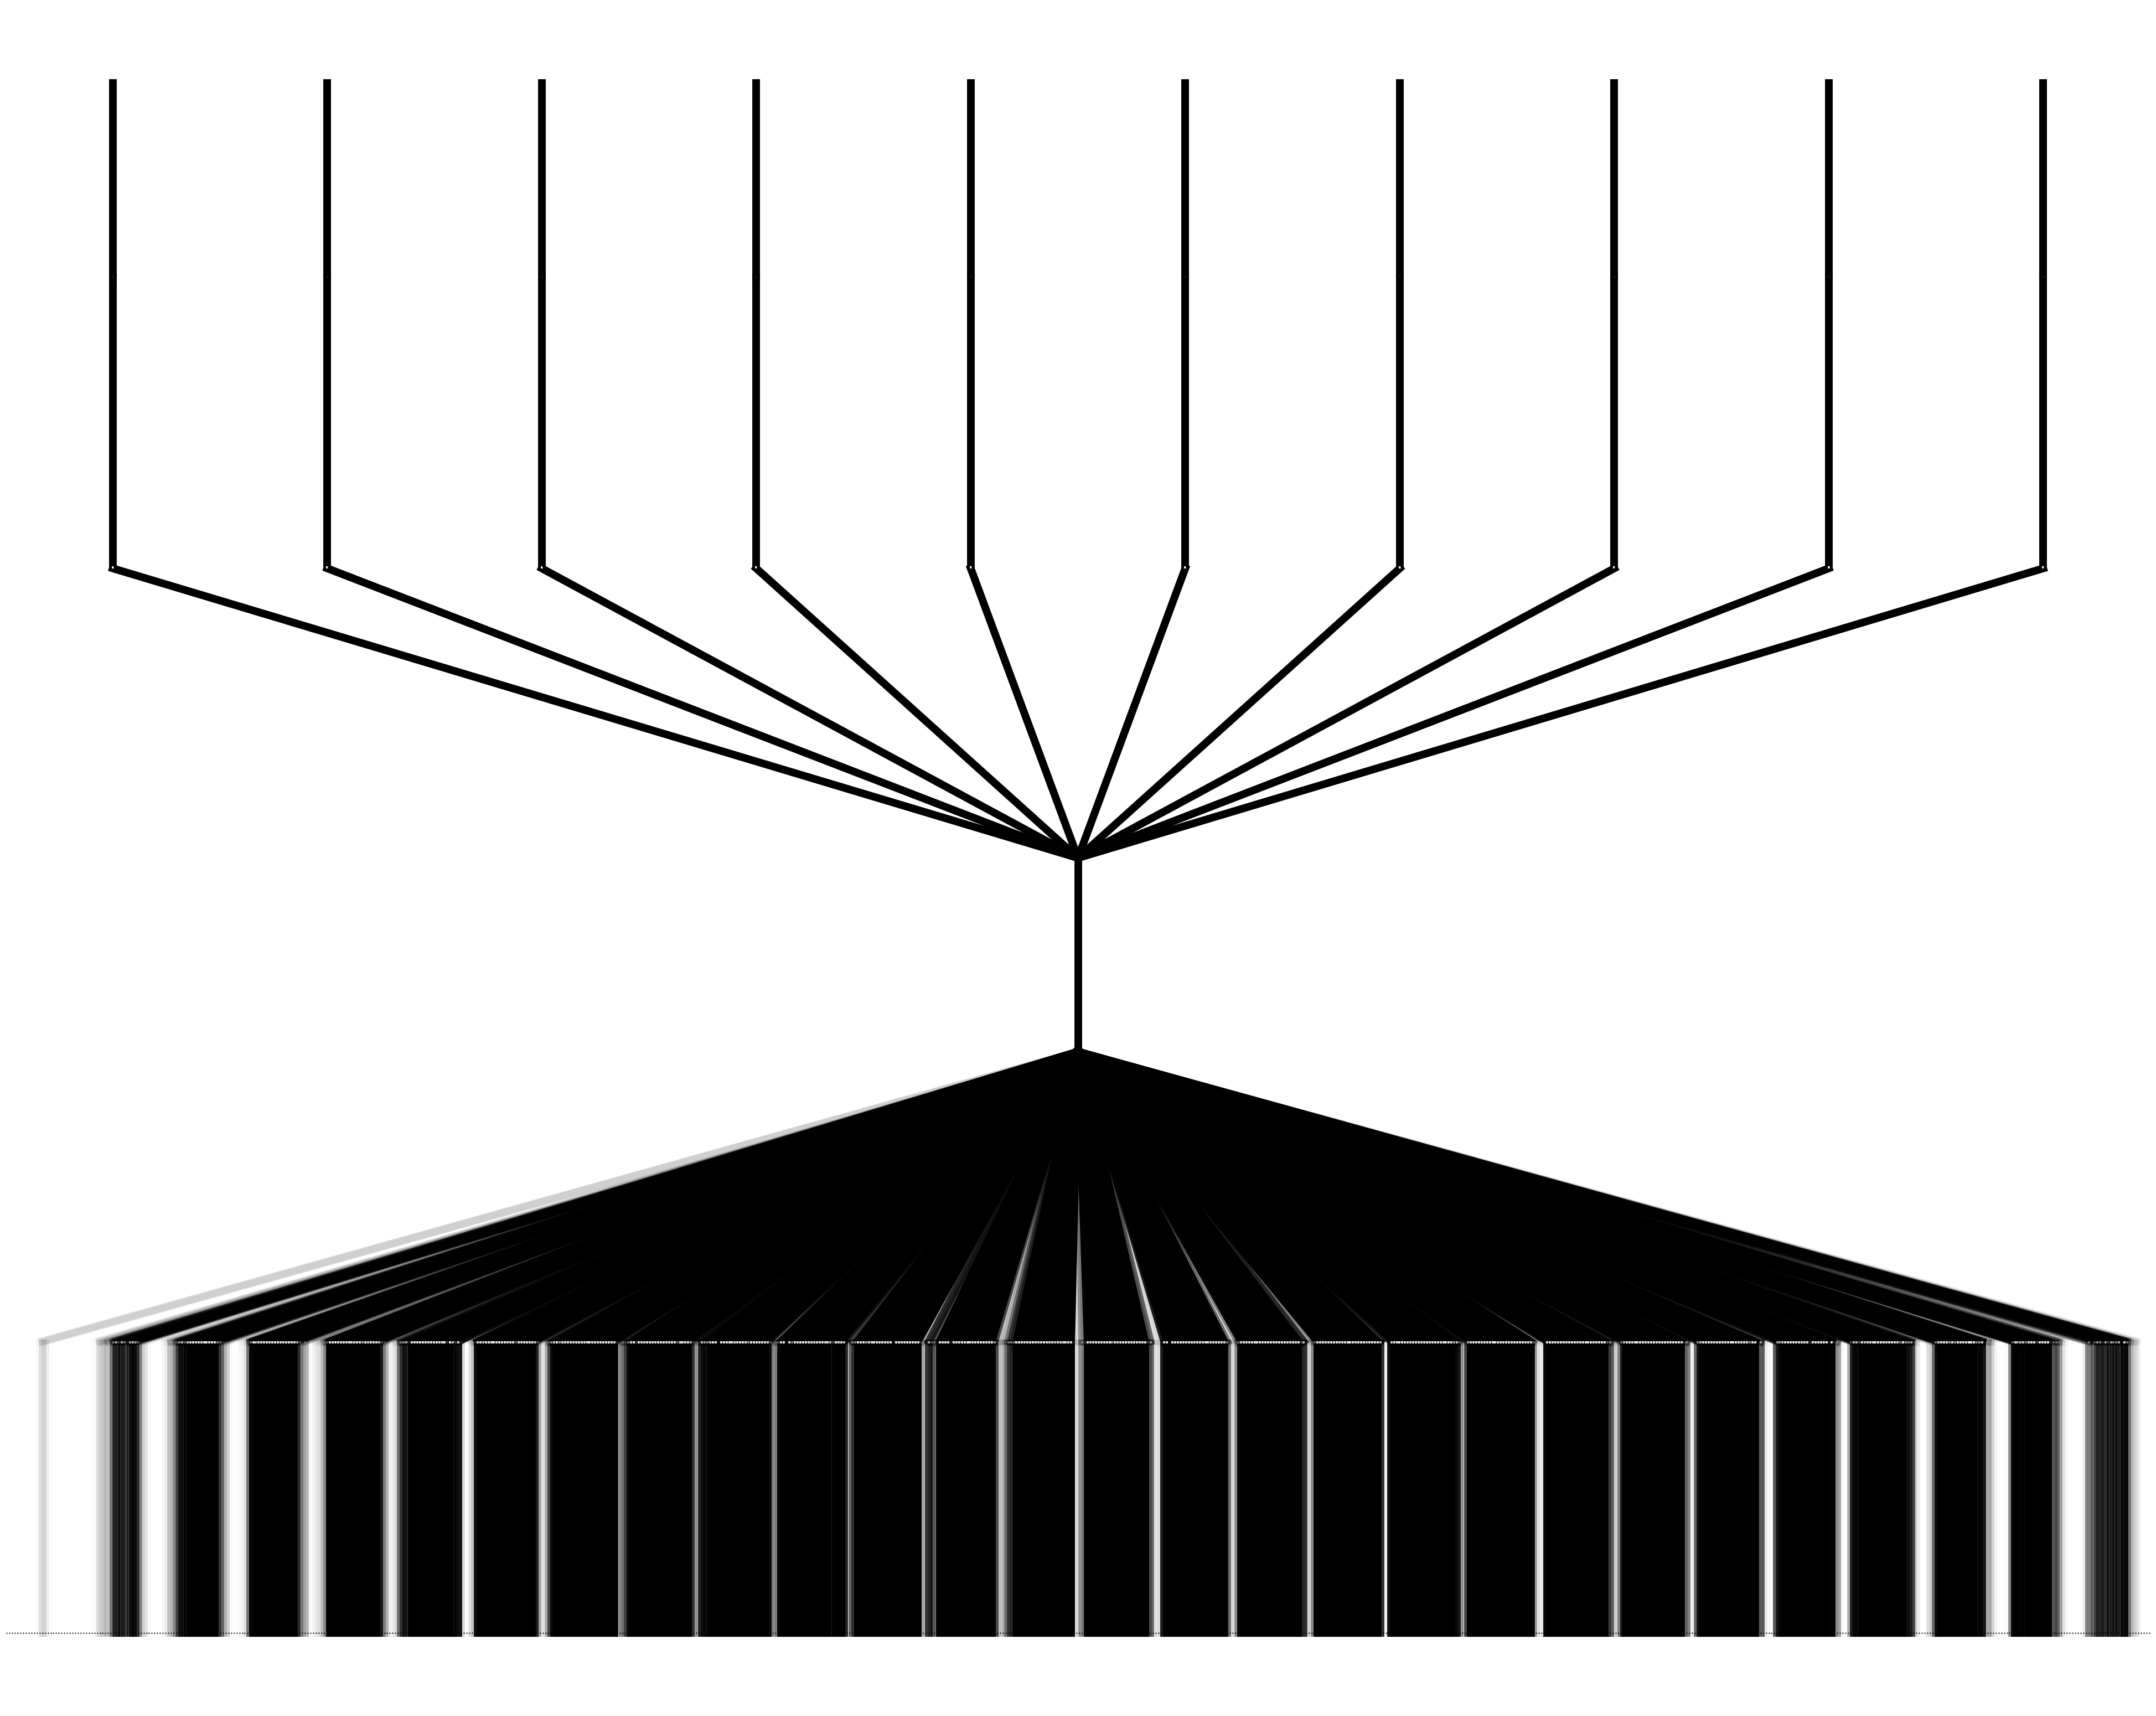

In [37]:
model.plot(beta=100, scale=5)